## Unique Song Analaysis

After having trouble finding clear trends when looking at chart-level metrics, I wondered if we could find trends by comparing the metrics of songs which only show up on one chart or the other in a particular year. Are songs which ONLY show up on the Spotify charts different than songs which ONLY show up on the Billboard charts?

Srinidhi Ramakrishna

In [1]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
spotifytop2017 = pd.read_csv('../data/Clean/spotifytop2017cleaned.csv')
billboardtop2017 = pd.read_csv('../data/Clean/billboard2017cleaned.csv')

spotifytop2020 = pd.read_csv('../data/Clean/spotifytop2020cleaned.csv')
billboardtop2020 = pd.read_csv('../data/Clean/billboard2020cleaned.csv')

spotifytop2021 = pd.read_csv('../data/Clean/spotifytop2021cleaned.csv')
billboardtop2021 = pd.read_csv('../data/Clean/billboard2021cleaned.csv')

Although they provided the top 98 songs in 2017, Spotify has only provided the top 50 most-streamed songs in the US in 2020 and 2021. On the other hand, Billboard provides the top 100 songs every year. Thus, due to these dataset limitations, we will cut the 2020 and 2021 Billboard datasets to the top 50 songs so as to make more effective comparisons and not distort our data.

In [3]:
billboardtop2020 = billboardtop2020[0:50]
billboardtop2021 = billboardtop2021[0:50]

### What's on the 2017 Spotify charts, but not on the Billboard charts? 

In [4]:
common2017 = spotifytop2017.merge(billboardtop2017, on=["name"])
spotifynotbillboard2017 = spotifytop2017[~spotifytop2017.name.isin(common2017.name)]

In [5]:
spotifynotbillboard2017.head()

,Unnamed: 0,rank,name,album,artist,release_date,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,explicit,duration_sec
21,21,22,Stay (with Alessia Cara),Stay,Zedd,2017-02-23,0.679,0.2320,0.634,0.000000,0.115,-5.024,0.0654,102.013,0.4980,False,210.090
26,26,27,I Don’t Wanna Live Forever (Fifty Shades Darke...,I Don’t Wanna Live Forever (Fifty Shades Darker),ZAYN,2016-12-09,0.735,0.0631,0.451,0.000013,0.325,-8.374,0.0585,117.973,0.0862,False,245.200
33,33,34,LOVE. FEAT. ZACARI.,DAMN.,Kendrick Lamar,2017-04-14,0.800,0.2640,0.585,0.000000,0.153,-7.343,0.0924,126.058,0.7790,True,213.400
38,38,39,Portland,More Life,Drake,2017-03-18,0.925,0.0172,0.443,0.000000,0.276,-8.216,0.2640,136.078,0.3500,True,236.614
42,42,43,BUTTERFLY EFFECT,BUTTERFLY EFFECT,Travis Scott,2017-05-18,0.763,0.0714,0.598,0.000000,0.112,-6.865,0.0539,140.987,0.1820,False,190.677


I noticed there may be some misalignment on names, which is causing songs that are actually on Billboard to show up here. Furtheremore, I learned that Billboard counts all remixes of a song as singular entities, meaning that any remixes of songs that show up on the Spotify charts do count data from the original version and thus should be removed from this analysis. 

Thus, I checked the entire list by hand. Ultimately, four songs are on the Billboard charts, under slightly different names - Stay by Zedd & Alessia Cara, I Don't Wanna Live Forever by ZAYN & Taylor Swift, Despacito by Luis Fonsi, and Mi Gente by J Balvin. I will remove them from this data frame.

In [6]:
spotifynotbillboard2017 = spotifynotbillboard2017.drop([21, 26, 52, 72])

In [7]:
len(spotifynotbillboard2017)

29

There were _29_ songs on the Spotify charts, but not the Billboard charts, in 2017. 

### What's on the 2017 Billboard charts, but not on the Spotify charts? 

In [8]:
billboardnotspotify2017 = billboardtop2017[~billboardtop2017.name.isin(common2017.name)]

In [9]:
billboardnotspotify2017.head()

,Unnamed: 0,Rank,name,album,artist,release_date,duration_ms,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,explicit,duration_sec
16,16,17,Stay,Stay,Zedd,2017-02-23,210090,78,0.690,0.2530,0.622,0.000000,0.1160,-5.025,0.0622,102.040,4,0.5440,False,210.090
25,25,26,I Don’t Wanna Live Forever (Fifty Shades Darker),Fifty Shades Darker (Original Motion Picture S...,Various Artists,2017-02-10,245653,70,0.734,0.0594,0.442,0.000016,0.2130,-8.432,0.0557,117.967,4,0.0973,False,245.653
29,29,30,Scars To Your Beautiful,Know-It-All (Deluxe),Alessia Cara,2015-11-13,230226,76,0.573,0.0285,0.739,0.000000,0.1110,-5.740,0.1290,97.085,4,0.4510,False,230.226
37,37,38,Don't Wanna Know (feat. Kendrick Lamar),Red Pill Blues (Deluxe),Maroon 5,2017-11-03,214265,0,0.776,0.3410,0.620,0.000000,0.0978,-6.198,0.0670,100.025,4,0.4270,False,214.265
38,38,39,Look What You Made Me Do,Look What You Made Me Do,Taylor Swift,2017-08-24,211859,0,0.767,0.2100,0.671,0.000011,0.1290,-6.416,0.1420,128.072,4,0.4740,False,211.859


After checking redundancies by hand, I realized I must remove Stay, I Don't Wanna Live Forever, and Mi Gente. 

In [10]:
billboardnotspotify2017 = billboardnotspotify2017.drop([16, 25, 49])

In [11]:
len(billboardnotspotify2017)

32

There were _32_ songs on the Billboard charts, but not the Spotify charts, in 2017. 

### 2017 Analysis

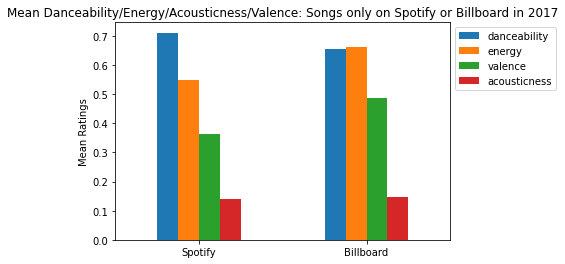

In [12]:
justspotify2017_mean_dance = spotifynotbillboard2017['danceability'].mean()
justspotify2017_mean_energy = spotifynotbillboard2017['energy'].mean()
justspotify2017_mean_acous = spotifynotbillboard2017['acousticness'].mean()
justspotify2017_mean_pos = spotifynotbillboard2017['valence'].mean()
justbillboard2017_mean_dance = billboardnotspotify2017['danceability'].mean()
justbillboard2017_mean_energy = billboardnotspotify2017['energy'].mean()
justbillboard2017_mean_acous = billboardnotspotify2017['acousticness'].mean()
justbillboard2017_mean_pos = billboardnotspotify2017['valence'].mean()

# Creating new dataframe and plotting
uniquesongdance_2017 = [justspotify2017_mean_dance, justbillboard2017_mean_dance]
uniquesongenergy_2017 = [justspotify2017_mean_energy, justbillboard2017_mean_energy]
uniquesongacous_2017 = [justspotify2017_mean_acous, justbillboard2017_mean_acous]
uniquesongpos_2017 = [justspotify2017_mean_pos, justbillboard2017_mean_pos]

index = ['Spotify', 'Billboard']
de2017_mean_df = pd.DataFrame({
    'danceability' : uniquesongdance_2017, 
    'energy' : uniquesongenergy_2017,
    'valence' : uniquesongpos_2017,
    'acousticness' : uniquesongacous_2017}, index = index)

de2017_mean_df.plot.bar(rot = 0)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Mean Danceability/Energy/Acousticness/Valence: Songs only on Spotify or Billboard in 2017')
plt.ylabel('Mean Ratings')
plt.show()

When comparing mean statistics, Spotify-only songs had _higher danceability_, but _less energy and valence/positiveness_ than Billboard-only songs in 2017. Acousticness levels on both charts remained the same.

Now, I wanted to compare duration across both data frames. 

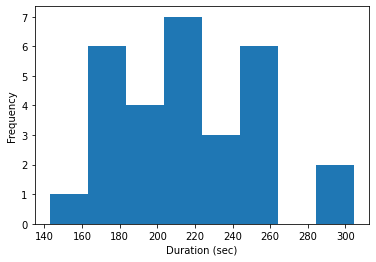

In [13]:
spotifynotbillboard2017['duration_sec'].plot(kind='hist', bins=8); # Creates histogram with ten bins
plt.xlabel("Duration (sec)");

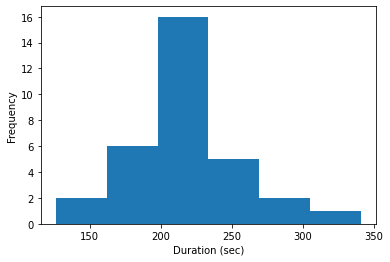

In [14]:
billboardnotspotify2017['duration_sec'].plot(kind='hist', bins=6); # Creates histogram with ten bins
plt.xlabel("Duration (sec)");

Song lengths of those on the Spotify charts are more dispersed, while songs on the Billboard charts cluster around a sweet spot of 200-225 seconds (between 3 and 4 minutes). This may speak to the need for 'radio edits' and other economics surrounding radio play.

### What's on the 2020 Spotify charts, but not on the Billboard charts? 

In [15]:
common2020 = spotifytop2020.merge(billboardtop2020, on=["name"])
spotifynotbillboard2020 = spotifytop2020[~spotifytop2020.name.isin(common2020.name)]

In [16]:
spotifynotbillboard2020.head()

,Unnamed: 0,rank,name,album,artist,release_date,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,explicit,duration_sec
10,10,11,WHATS POPPIN,Sweet Action,Jack Harlow,2020-03-13,0.923,0.017,0.604,0.0,0.2720,-6.671,0.2450,145.062,0.826,True,139.741
19,19,20,Sunflower - Spider-Man: Into the Spider-Verse,Hollywood's Bleeding,Post Malone,2019-09-06,0.755,0.533,0.522,0.0,0.0685,-4.368,0.0575,89.960,0.925,False,157.560
20,20,21,Godzilla (feat. Juice WRLD),Music To Be Murdered By,Eminem,2020-01-17,0.808,0.145,0.745,0.0,0.2920,-5.260,0.3420,165.995,0.829,True,210.800
21,21,22,Sunday Best,Where the Light Is,Surfaces,2019-01-06,0.878,0.183,0.525,0.0,0.0714,-6.832,0.0578,112.022,0.694,False,158.571
23,23,24,Lucid Dreams,Goodbye & Good Riddance,Juice WRLD,2018-12-10,0.511,0.349,0.566,0.0,0.3400,-7.230,0.2000,83.903,0.218,True,239.835


After checking redundancies by hand, WHAT'S POPPIN was the only song which was also actually on the Billboard Hot 100 cut to the top 50 songs. I will remove it.

In [17]:
spotifynotbillboard2020 = spotifynotbillboard2020.drop([10])

In [18]:
len(spotifynotbillboard2020)

19

There were 19 songs on the Spotify charts, but not the Billboard charts, in 2020. 

### What's on the 2020 Billboard charts, but not on the Spotify charts? 

In [19]:
billboardnotspotify2020 = billboardtop2020[~billboardtop2020.name.isin(common2020.name)]

In [20]:
billboardnotspotify2020.head()

,Unnamed: 0,Rank,name,album,artist,release_date,duration_ms,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,explicit,duration_sec
7,7,8,Memories,Memories,Maroon 5,2019-09-20,189486,38,0.764,0.8370,0.320,0.0,0.0822,-7.209,0.0546,91.019,4,0.575,False,189.486
8,8,9,The Bones,GIRL,Maren Morris,2019-03-08,197293,79,0.612,0.2780,0.570,0.0,0.0963,-6.642,0.0347,77.004,4,0.334,False,197.293
11,11,12,I Hope (feat. Charlie Puth),Goldmine,Gabby Barrett,2020-06-19,211605,69,0.563,0.1710,0.576,0.0,0.1580,-6.495,0.0401,75.019,4,0.412,False,211.605
14,14,15,Savage,Suga,Megan Thee Stallion,2020-03-06,155497,76,0.843,0.0252,0.741,0.0,0.0960,-5.609,0.3340,168.983,4,0.680,True,155.497
22,22,23,"10,000 Hours (with Justin Bieber)","10,000 Hours (with Justin Bieber)",Dan + Shay,2019-10-04,167693,82,0.654,0.1530,0.630,0.0,0.1110,-4.644,0.0259,89.991,4,0.430,False,167.693


After checking this list by hand, no redundancies were found.

In [21]:
len(billboardnotspotify2020)

20

20 songs were on the Billboard charts, but not the Spotify charts, in 2020. 

I will conduct a preliminary yearly analysis of mean statistics between songs that only showed up on one chart or the other.

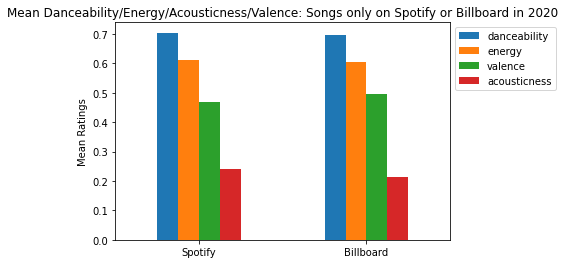

In [22]:
justspotify2020_mean_dance = spotifynotbillboard2020['danceability'].mean()
justspotify2020_mean_energy = spotifynotbillboard2020['energy'].mean()
justspotify2020_mean_acous = spotifynotbillboard2020['acousticness'].mean()
justspotify2020_mean_pos = spotifynotbillboard2020['valence'].mean()
justbillboard2020_mean_dance = billboardnotspotify2020['danceability'].mean()
justbillboard2020_mean_energy = billboardnotspotify2020['energy'].mean()
justbillboard2020_mean_acous = billboardnotspotify2020['acousticness'].mean()
justbillboard2020_mean_pos = billboardnotspotify2020['valence'].mean()

# Creating new dataframe and plotting
uniquesongdance_2020 = [justspotify2020_mean_dance, justbillboard2020_mean_dance]
uniquesongenergy_2020 = [justspotify2020_mean_energy, justbillboard2020_mean_energy]
uniquesongacous_2020 = [justspotify2020_mean_acous, justbillboard2020_mean_acous]
uniquesongpos_2020 = [justspotify2020_mean_pos, justbillboard2020_mean_pos]

index = ['Spotify', 'Billboard']
de2020_mean_df = pd.DataFrame({
    'danceability' : uniquesongdance_2020, 
    'energy' : uniquesongenergy_2020,
    'valence' : uniquesongpos_2020,
    'acousticness' : uniquesongacous_2020}, index = index)

de2020_mean_df.plot.bar(rot = 0)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Mean Danceability/Energy/Acousticness/Valence: Songs only on Spotify or Billboard in 2020')
plt.ylabel('Mean Ratings')
plt.show()

When comparing mean statistics, there does not seem to be a sizable difference between Spotify-only and Billboard-only songs in 2020. 

### What's on the 2021 Spotify charts, but not on the Billboard charts? 

In [23]:
common2021 = spotifytop2021.merge(billboardtop2021, on=["name"])
spotifynotbillboard2021 = spotifytop2021[~spotifytop2021.name.isin(common2021.name)]

In [24]:
spotifynotbillboard2021.head()

,Unnamed: 0,rank,name,album,artist,release_date,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,explicit,duration_sec
4,4,5,Levitating (feat. DaBaby),Future Nostalgia,Dua Lipa,2020-03-27,0.702,0.00883,0.825,0.000000,0.0674,-3.787,0.0601,102.977,0.915,False,203.064
11,11,12,Good Days,Good Days,SZA,2020-12-25,0.436,0.49900,0.655,0.000008,0.6880,-8.370,0.0583,121.002,0.412,True,279.204
15,15,16,Streets,Hot Pink,Doja Cat,2019-11-07,0.749,0.21000,0.463,0.038200,0.3380,-8.433,0.0842,90.035,0.189,True,226.986
25,25,26,Sweater Weather,I Love You.,The Neighbourhood,2013-04-19,0.612,0.04950,0.807,0.017700,0.1010,-2.810,0.0336,124.053,0.398,False,240.400
30,30,31,"Lemonade (feat. Gunna, Don Toliver & NAV)",B4 The Storm,Internet Money,2020-08-28,0.800,0.25000,0.658,0.000000,0.1110,-6.142,0.0790,140.042,0.462,True,195.428


Levitating by Dua Lipa and Save Your Tears by The Weeknd are also on the Billboard charts - they will be removed. 

In [25]:
spotifynotbillboard2021 = spotifynotbillboard2021.drop([4, 49])

In [26]:
len(spotifynotbillboard2021)

15

There were _15_ songs on the Spotify charts, but not the Billboard charts, in 2021.

### What's on the 2021 Billboard charts, but not on the Spotify charts? 

In [27]:
billboardnotspotify2021 = billboardtop2021[~billboardtop2021.name.isin(common2021.name)]

In [28]:
billboardnotspotify2021

,Unnamed: 0,Rank,name,album,artist,release_date,duration_ms,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,explicit,duration_sec
0,0,1,Levitating,Future Nostalgia,Dua Lipa,2020-03-27,203807,87,0.695,0.056100,0.884,0.000000,0.2130,-2.278,0.0753,103.014,4,0.9140,False,203.807
10,10,11,Butter,Butter,BTS,2021-05-21,164441,33,0.759,0.003230,0.459,0.000000,0.0906,-5.187,0.0948,109.997,4,0.6950,False,164.441
17,17,18,Forever After All,What You See Ain't Always What You Get (Deluxe...,Luke Combs,2020-10-23,232533,81,0.487,0.191000,0.650,0.000000,0.0933,-5.195,0.0253,151.964,4,0.4560,False,232.533
18,18,19,Go Crazy,Slime & B,Chris Brown,2020-05-08,176960,82,0.755,0.316000,0.578,0.000000,0.2500,-8.932,0.1450,94.148,4,0.5810,True,176.960
24,24,25,Therefore I Am,Therefore I Am,Billie Eilish,2020-11-12,174321,82,0.889,0.218000,0.340,0.130000,0.0550,-7.773,0.0697,94.009,4,0.7160,False,174.321
26,26,27,Fancy Like,Country Stuff,Walker Hayes,2021-06-04,161853,84,0.649,0.114000,0.760,0.000000,0.3170,-6.487,0.0574,80.018,4,0.8430,False,161.853
33,33,34,Beautiful Mistakes (feat. Megan Thee Stallion),Beautiful Mistakes (feat. Megan Thee Stallion),Maroon 5,2021-03-03,227395,38,0.713,0.037700,0.676,0.000000,0.1540,-5.483,0.0270,99.048,4,0.7210,False,227.395
34,34,35,Holy (feat. Chance The Rapper),Holy,Justin Bieber,2020-09-18,212093,81,0.673,0.196000,0.704,0.000000,0.0898,-8.056,0.3600,86.919,4,0.3720,False,212.093
35,35,36,On Me,On Me,Lil Baby,2020-12-04,135959,79,0.856,0.003270,0.564,0.000000,0.1340,-6.295,0.3920,77.972,4,0.4830,True,135.959
36,36,37,you broke me first,you broke me first,Tate McRae,2020-04-17,169265,89,0.667,0.785000,0.373,0.000000,0.0906,-9.389,0.0500,124.148,4,0.0823,False,169.265


Levitating by Dua Lipa is also on the Spotify charts - it will be removed. 

In [29]:
billboardnotspotify2021 = billboardnotspotify2021.drop([0])

In [30]:
len(billboardnotspotify2021)

16

There were _16_ songs on the Billboard charts, but not the Spotify charts, in 2021.

Like before, I will conduct a preliminary yearly analysis of mean statistics between songs that only showed up on one chart or the other.

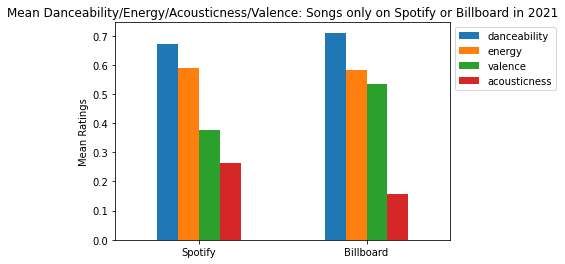

In [31]:
justspotify2021_mean_dance = spotifynotbillboard2021['danceability'].mean()
justspotify2021_mean_energy = spotifynotbillboard2021['energy'].mean()
justspotify2021_mean_acous = spotifynotbillboard2021['acousticness'].mean()
justspotify2021_mean_pos = spotifynotbillboard2021['valence'].mean()

justbillboard2021_mean_dance = billboardnotspotify2021['danceability'].mean()
justbillboard2021_mean_energy = billboardnotspotify2021['energy'].mean()
justbillboard2021_mean_acous = billboardnotspotify2021['acousticness'].mean()
justbillboard2021_mean_pos = billboardnotspotify2021['valence'].mean()

# Creating new dataframe and plotting
uniquesongdance_2021 = [justspotify2021_mean_dance, justbillboard2021_mean_dance]
uniquesongenergy_2021 = [justspotify2021_mean_energy, justbillboard2021_mean_energy]
uniquesongacous_2021 = [justspotify2021_mean_acous, justbillboard2021_mean_acous]
uniquesongpos_2021 = [justspotify2021_mean_pos, justbillboard2021_mean_pos]

index = ['Spotify', 'Billboard']
de2021_mean_df = pd.DataFrame({
    'danceability' : uniquesongdance_2021, 
    'energy' : uniquesongenergy_2021,
    'valence' : uniquesongpos_2021,
    'acousticness' : uniquesongacous_2021}, index = index)

de2021_mean_df.plot.bar(rot = 0)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Mean Danceability/Energy/Acousticness/Valence: Songs only on Spotify or Billboard in 2021')
plt.ylabel('Mean Ratings')
plt.show()

When comparing mean statistics, Spotify-only songs had _higher acousticness_, but _less valence and slightly less danceability_ than Billboard-only songs in 2017. Energy levels on both charts remained about the same.

### Merging Datasets

In [32]:
# Creating a dataset, spotifyonly_all, with songs only on the Spotify charts in 2017, 2020, and 2021
spotifyframes = [spotifynotbillboard2017, spotifynotbillboard2020, spotifynotbillboard2021]
spotifyonly_all = pd.concat(spotifyframes)

spotifyonly_all.to_csv("../data/Clean/spotifyonly_allyears.csv", sep = ',')

In [33]:
# Creating a dataset, billboardonly_all, with songs only on the Billboard charts in 2017, 2020, and 2021
billboardframes = [billboardnotspotify2017, billboardnotspotify2020, billboardnotspotify2021]
billboardonly_all = pd.concat(billboardframes)

billboardonly_all.to_csv("../data/Clean/billboardonly_allyears.csv", sep = ',')